In [18]:
import pandas as pd
import gpxpy.geo as geo
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm
from sklearn.linear_model import SGDClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc,confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.preprocessing import normalize
from sklearn.ensemble import RandomForestClassifier
import random
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import datetime
from sklearn.linear_model import LogisticRegression
from prettytable import PrettyTable
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

In [8]:
def plot_matrices(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(10,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()


In [9]:
from sklearn.manifold import TSNE

In [31]:
# performs t-sne with different perplexity values and their repective plots..

def perform_tsne(X_data, y_data, perplexities, n_iter=500, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1")
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')

In [10]:
D_total=pd.read_csv('X_107.csv')


performing tsne with perplexity 20 and with 500 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 68917 samples in 0.296s...
[t-SNE] Computed neighbors for 68917 samples in 3.023s...
[t-SNE] Computed conditional probabilities for sample 1000 / 68917
[t-SNE] Computed conditional probabilities for sample 2000 / 68917
[t-SNE] Computed conditional probabilities for sample 3000 / 68917
[t-SNE] Computed conditional probabilities for sample 4000 / 68917
[t-SNE] Computed conditional probabilities for sample 5000 / 68917
[t-SNE] Computed conditional probabilities for sample 6000 / 68917
[t-SNE] Computed conditional probabilities for sample 7000 / 68917
[t-SNE] Computed conditional probabilities for sample 8000 / 68917
[t-SNE] Computed conditional probabilities for sample 9000 / 68917
[t-SNE] Computed conditional probabilities for sample 10000 / 68917
[t-SNE] Computed conditional probabilities for sample 11000 / 68917
[t-SNE] Computed conditional probabilities for samp

<IPython.core.display.Javascript object>


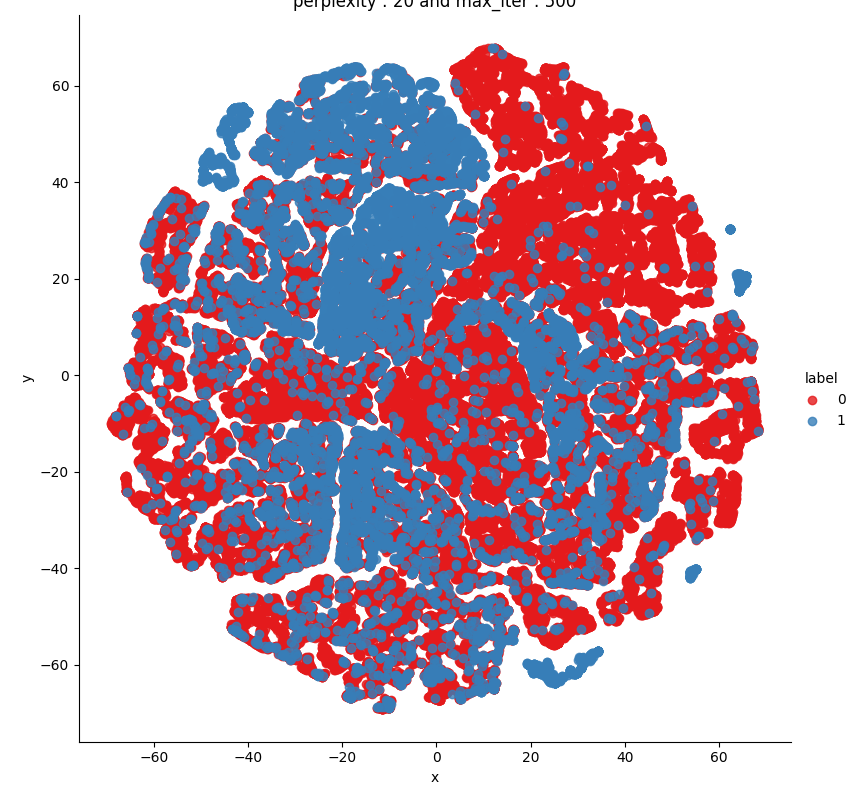

Done

performing tsne with perplexity 50 and with 500 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 68917 samples in 0.299s...
[t-SNE] Computed neighbors for 68917 samples in 4.840s...
[t-SNE] Computed conditional probabilities for sample 1000 / 68917
[t-SNE] Computed conditional probabilities for sample 2000 / 68917
[t-SNE] Computed conditional probabilities for sample 3000 / 68917
[t-SNE] Computed conditional probabilities for sample 4000 / 68917
[t-SNE] Computed conditional probabilities for sample 5000 / 68917
[t-SNE] Computed conditional probabilities for sample 6000 / 68917
[t-SNE] Computed conditional probabilities for sample 7000 / 68917
[t-SNE] Computed conditional probabilities for sample 8000 / 68917
[t-SNE] Computed conditional probabilities for sample 9000 / 68917
[t-SNE] Computed conditional probabilities for sample 10000 / 68917
[t-SNE] Computed conditional probabilities for sample 11000 / 68917
[t-SNE] Computed conditional probabilities fo

<IPython.core.display.Javascript object>


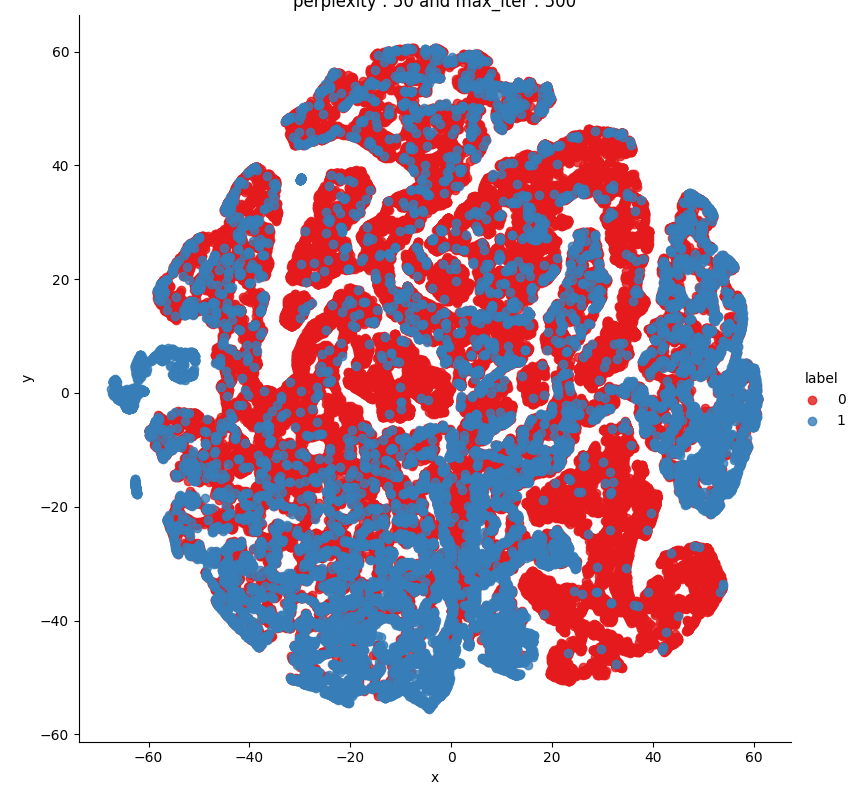

Done


In [349]:
X_pre_tsne = D_total.drop('y', axis=1)
y_pre_tsne = D_total['y']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[20,50])

In [112]:
D_total.shape

(68917, 5)

In [113]:
D_total.head()

,distance_x,rankDistance,cella_projection_site,cellb_projection_site,y
0,2937.055312,30,346,111,0
1,2937.055312,30,346,211,0
2,2937.055312,30,346,311,0
3,2521.934728,22,52,52,0
4,2521.934728,22,52,172,0


In [114]:
D_total.shape

(68917, 5)

In [11]:
D_total.y.value_counts()

0.0    21651
1.0     5379
Name: y, dtype: int64

### For linear regression classifier we need to normalize all features

In [35]:
D_total=pd.read_csv('X_107.csv')
D_tr,D_te=train_test_split(D_total,test_size=0.2,shuffle=True)
D_tr1=D_tr[D_tr['y']==1]
D_tr0=D_tr[D_tr['y']==0]
one_class_upsample = resample(D_tr1,
             replace=True,
             n_samples=D_tr0.shape[0],
             random_state=42)
D_train=one_class_upsample.append(D_tr0)
y_train=D_train['y']
X_train=D_train.drop(['y'],axis=1)
y_test=D_te['y']
X_test=D_te.drop(['y'],axis=1)

In [30]:
D_total=pd.read_csv('X_107.csv')
y = D_total['y'].values
X = D_total.drop(['y'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True,random_state=14)

In [27]:
def gen_augment(df):
    rows=[]
    for i,row in df.iterrows():
        row1=row-row*(random.randint(-5,5)/100)
        row1['y']=1
        rows.append(row1)
    return rows
D_total=pd.read_csv('X_107.csv')
D_tr,D_te=train_test_split(D_total,test_size=0.2,shuffle=True)
D_tr1=D_tr[D_tr['y']==1]
new_1=gen_augment(D_tr1)
D_tr0=D_tr[D_tr['y']==0]
D_train=D_tr.append(new_1)
y_train=D_train['y']
X_train=D_train.drop(['y'],axis=1)
y_test=D_te['y']
X_test=D_te.drop(['y'],axis=1)

In [36]:
for col in D_total.columns:
    if(col=='y'):
        continue
    D_total[col]=normalize(D_total[col].values.reshape(-1,1),axis=0)

<IPython.core.display.Javascript object>


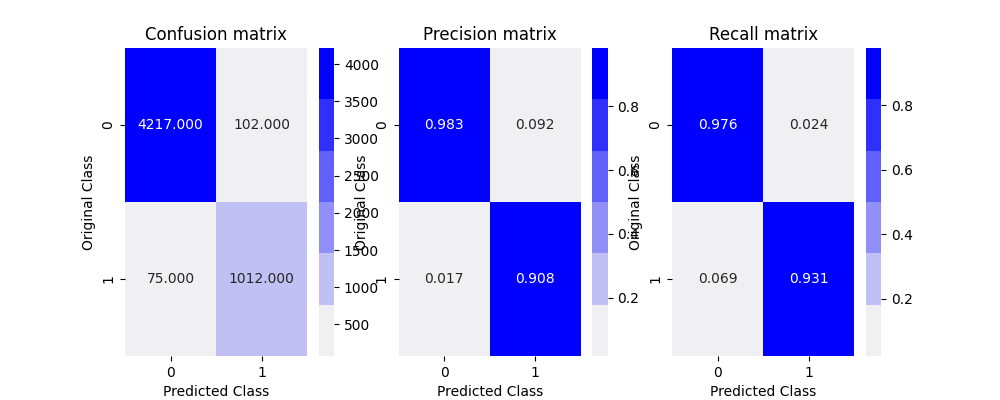

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      4319
         1.0       0.91      0.93      0.92      1087

    accuracy                           0.97      5406
   macro avg       0.95      0.95      0.95      5406
weighted avg       0.97      0.97      0.97      5406

F1 score is  0.9195820081781009


In [29]:
clf=KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train,y_train)
plot_matrices(y_test,clf.predict(X_test))
print(classification_report(y_test,clf.predict(X_test)))
print(f"F1 score is  {f1_score(y_test,clf.predict(X_test))}")

In [91]:
import pickle
with open('Knn', 'wb') as f:
    pickle.dump(clf, f)

In [37]:
D_total.describe()

,azi1,azi2,dist_x,y,angleBWSites,quad_s,quad_x,quad_y,quad_st,diff_x,quad_diff,rank_dist
count,25452.000000,25452.000000,25452.000000,25452.000000,25452.000000,25452.000000,25452.000000,25452.000000,25452.000000,25452.000000,25452.000000,25452.000000
mean,165.111386,165.111386,1781.864076,0.196998,181.009943,5.550919,5.225719,5.225719,5.372702,3.963343,7.989863,18.036421
std,107.336221,107.336221,767.562991,0.397739,100.389279,3.339411,3.546069,3.546069,3.468310,2.849980,3.897892,12.201308
min,0.000000,0.000000,0.000000,0.000000,0.128486,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,80.000000,80.000000,1209.910395,0.000000,93.559844,3.000000,2.000000,2.000000,2.000000,2.000000,5.000000,8.000000
50%,150.000000,150.000000,1865.986380,0.000000,180.000000,6.000000,5.000000,5.000000,5.000000,3.000000,8.000000,16.000000
75%,260.000000,260.000000,2424.137491,0.000000,268.896725,8.000000,8.000000,8.000000,8.000000,6.000000,11.000000,27.000000
max,350.000000,350.000000,2998.532276,1.000000,359.964156,11.000000,11.000000,11.000000,11.000000,11.000000,17.000000,54.000000


# Logistic  regression

In [37]:
start = datetime.datetime.now()
model=SGDClassifier(loss='log')
parameters = {'alpha':[.001,0.01,.1,1,10]}
clf = GridSearchCV(model, parameters, cv=2, scoring='f1',return_train_score=True,n_jobs=-1)
clf.fit(X_train,y_train)
end= datetime.datetime.now()
print(end-start)

0:00:07.797818


<IPython.core.display.Javascript object>


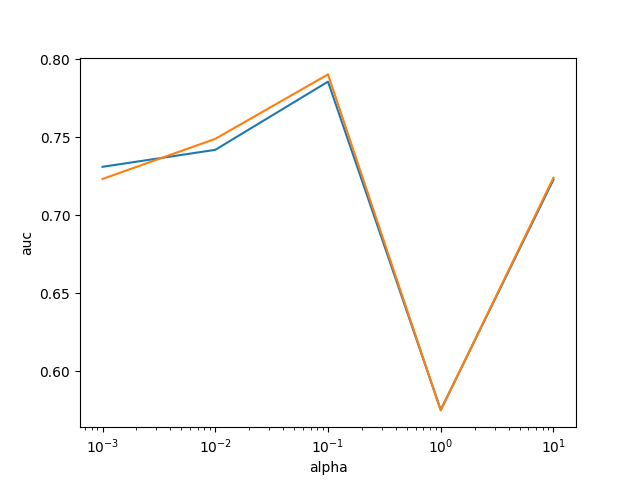

In [38]:
results = pd.DataFrame.from_dict(clf.cv_results_)
train_auc= results['mean_train_score']
cv_auc = results['mean_test_score'] 
plt.plot(parameters['alpha'],train_auc,label='train')
plt.plot(parameters['alpha'],cv_auc,label='test')
plt.xscale('log')
plt.xlabel("alpha")
plt.ylabel("auc")
plt.show()


<IPython.core.display.Javascript object>


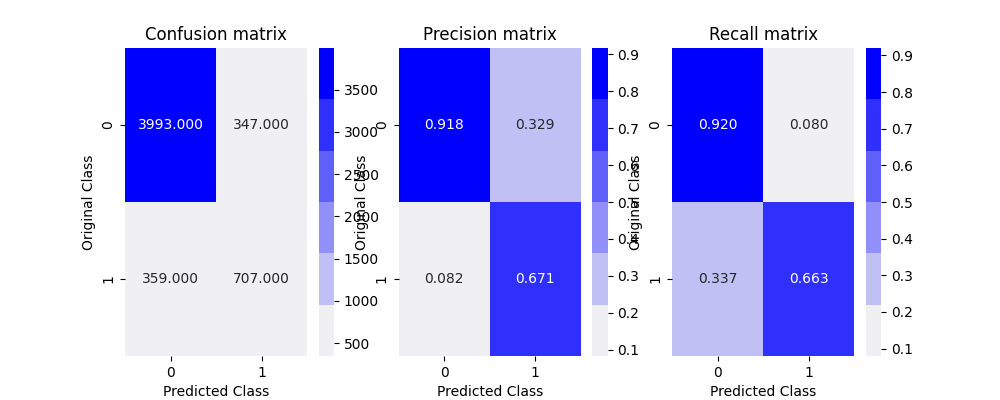

F1 score is  0.43742203742203745


In [39]:
model=SGDClassifier(alpha=.1,loss='log')
model.fit(X_train,y_train)
plot_matrices(y_test,model.predict(X_test))
print(f"F1 score is  {f1_score(y_test,clf.predict(X_test))}")

### Logistic Regression

In [40]:
start = datetime.datetime.now()

model=LogisticRegression()
parameters = {'C':[10 ** x for x in range(-3,7)]}
clf = GridSearchCV(model, parameters, cv=2, scoring='f1',return_train_score=True,n_jobs=-1)
clf.fit(X_train,y_train)
end= datetime.datetime.now()
print(end-start)

0:00:02.938083


<IPython.core.display.Javascript object>


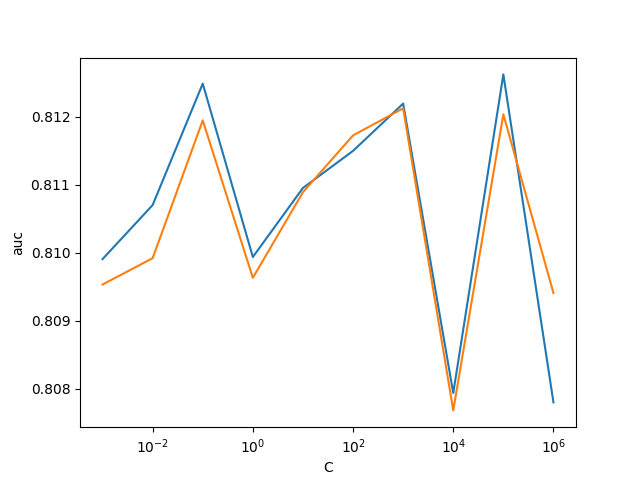

In [41]:
results = pd.DataFrame.from_dict(clf.cv_results_)
train_auc= results['mean_train_score']
cv_auc = results['mean_test_score'] 
plt.plot(parameters['C'],train_auc,label='train')
plt.plot(parameters['C'],cv_auc,label='test')
plt.xscale('log')
plt.xlabel("C")
plt.ylabel("auc")
plt.show()

<IPython.core.display.Javascript object>


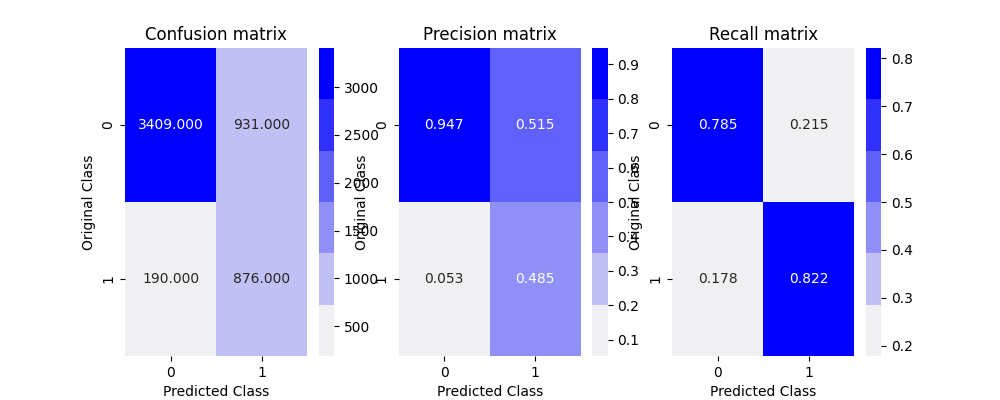

F1 score is  0.6098155238426731


In [43]:
model=LogisticRegression(C=1000)
model.fit(X_train,y_train)
plot_matrices(y_test,model.predict(X_test))
print(f"F1 score is  {f1_score(y_test,clf.predict(X_test))}")

In [101]:
## SKLEARN UPSAMPLING

D_total=pd.read_csv('X_107.csv')
D_tr,D_te=train_test_split(D_total,test_size=0.2,shuffle=True)
D_tr1=D_tr[D_tr['y']==1]
D_tr0=D_tr[D_tr['y']==0]
one_class_upsample = resample(D_tr1,
             replace=True,
             n_samples=D_tr0.shape[0],
             random_state=42)
D_train=one_class_upsample.append(D_tr0)
y_train=D_train['y']
X_train=D_train.drop(['y'],axis=1)
y_test=D_te['y']
X_test=D_te.drop(['y'],axis=1)

In [90]:
## no upsampling
D_total=pd.read_csv('X_107.csv')
y = D_total['y'].values
X = D_total.drop(['y'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True,random_state=14)

In [106]:
### augmented data addition
def gen_augment(df):
    rows=[]
    for i,row in df.iterrows():
        row1=row-row*(random.randint(-2,2)/100)
        row1['y']=1
        rows.append(row1)
    return rows
D_total=pd.read_csv('X_107.csv')
D_tr,D_te=train_test_split(D_total,test_size=0.2,shuffle=True)
D_tr1=D_tr[D_tr['y']==1]
new_1=gen_augment(D_tr1)
D_tr0=D_tr[D_tr['y']==0]
D_train=D_tr.append(new_1)
y_train=D_train['y']
X_train=D_train.drop(['y'],axis=1)
y_test=D_te['y']
X_test=D_te.drop(['y'],axis=1)

In [75]:
start = datetime.datetime.now()
model=RandomForestClassifier(n_jobs=-1)
parameters = {'max_depth':[3,7,10,15,20],'n_estimators':[10,50,100,200,300]}
clf = GridSearchCV(model, parameters, cv=2, scoring='f1',return_train_score=True,n_jobs=-1)
clf.fit(X_train,y_train)
end= datetime.datetime.now()
print("Time taken for hyper parameter tuning is " +str(end-start))

Time taken for hyper parameter tuning is 0:00:15.383721


<IPython.core.display.Javascript object>


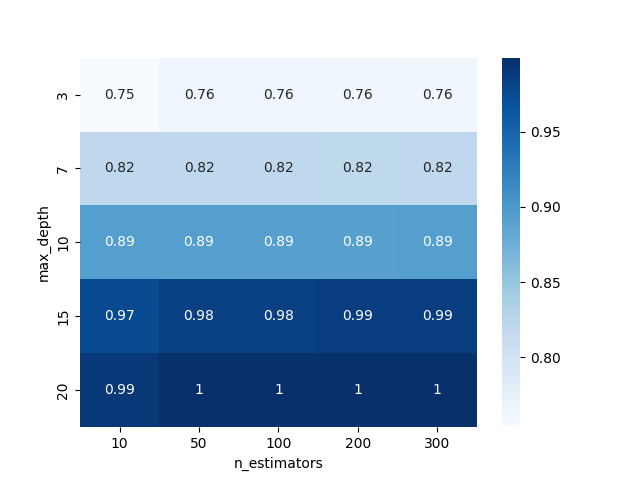

In [76]:
results = pd.DataFrame.from_dict(clf.cv_results_)
train_auc= results['mean_train_score']
cv_auc = results['mean_test_score'] 
sns.heatmap(np.array(train_auc).reshape(5,5), annot=True,cmap='Blues',xticklabels=parameters['n_estimators'],yticklabels=parameters['max_depth'])
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.show()

<IPython.core.display.Javascript object>


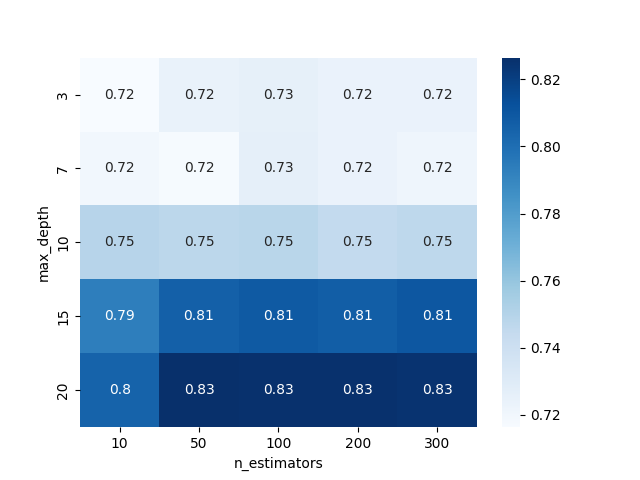

In [77]:
sns.heatmap(np.array(cv_auc).reshape(5,5), annot=True,cmap='Blues',xticklabels=parameters['n_estimators'],yticklabels=parameters['max_depth'])
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.show()

<IPython.core.display.Javascript object>


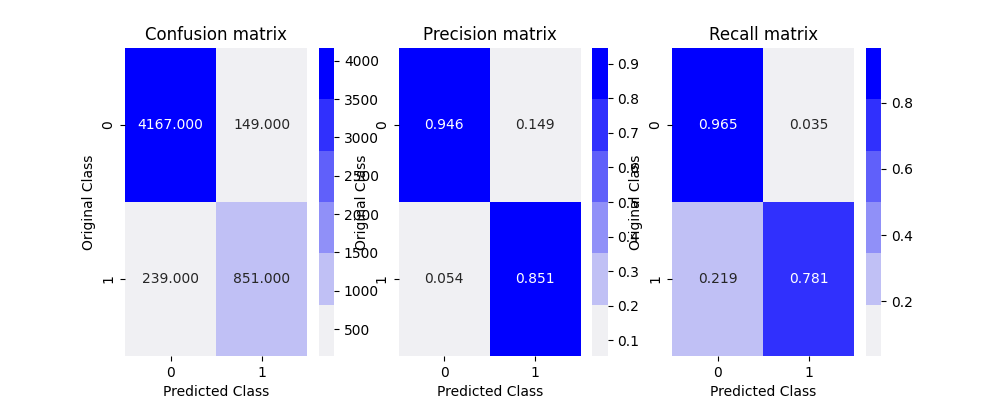

F1 score is  0.8143540669856459


In [78]:
model=RandomForestClassifier(max_depth=50,n_estimators=20)
model.fit(X_train,y_train)
plot_matrices(y_test,model.predict(X_test))
print(f"F1 score is  {f1_score(y_test,model.predict(X_test))}")

In [18]:
import pickle
with open('model1', 'wb') as f:
    pickle.dump(model, f)

### LGBOOST
we will keep using full dataset as LGBOOST is faster

In [91]:
start = datetime.datetime.now()
model=LGBMClassifier()
parameters = {'max_depth':[1,3,5,7,10],'n_estimators':[100,200,500,1000,2000]}
clf = GridSearchCV(model, parameters, cv=2, scoring='f1',return_train_score=True,n_jobs=-1)
clf.fit(X_train,y_train)
end= datetime.datetime.now()
print("Time taken for hyper parameter tuning is " +str(end-start))


Time taken for hyper parameter tuning is 0:00:41.338206


<IPython.core.display.Javascript object>


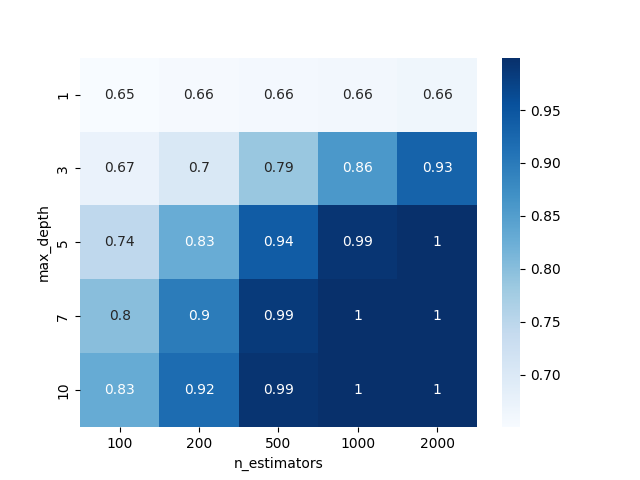

In [92]:
results = pd.DataFrame.from_dict(clf.cv_results_)
train_auc= results['mean_train_score']
cv_auc = results['mean_test_score'] 
sns.heatmap(np.array(train_auc).reshape(5,5), annot=True,cmap='Blues',xticklabels=parameters['n_estimators'],yticklabels=parameters['max_depth'])
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.show()

<IPython.core.display.Javascript object>


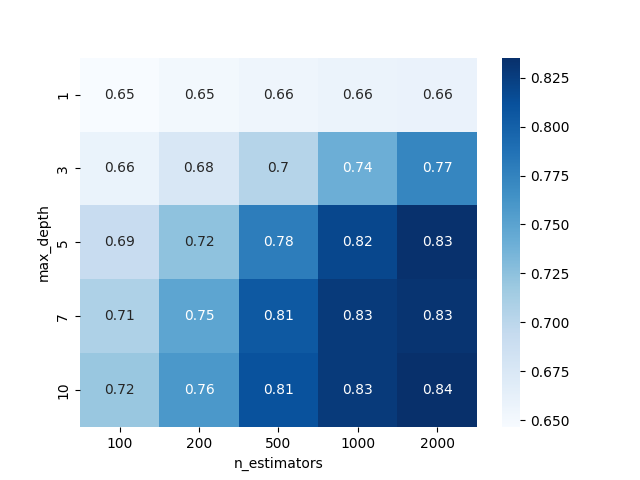

In [93]:
sns.heatmap(np.array(cv_auc).reshape(5,5), annot=True,cmap='Blues',xticklabels=parameters['n_estimators'],yticklabels=parameters['max_depth'])
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.show()

<IPython.core.display.Javascript object>


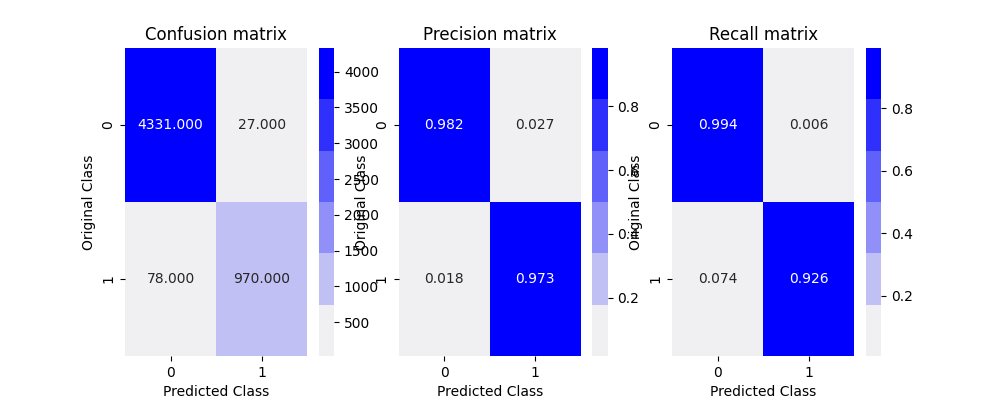

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      4358
         1.0       0.97      0.93      0.95      1048

    accuracy                           0.98      5406
   macro avg       0.98      0.96      0.97      5406
weighted avg       0.98      0.98      0.98      5406

F1 score is  0.9486552567237163


In [94]:
model=LGBMClassifier(n_estimators=2000,max_depth=10)
model.fit(X_train,y_train)
plot_matrices(y_test,model.predict(X_test))
print(classification_report(y_test,model.predict(X_test)))
print(f"F1 score is  {f1_score(y_test,model.predict(X_test))}")

<IPython.core.display.Javascript object>


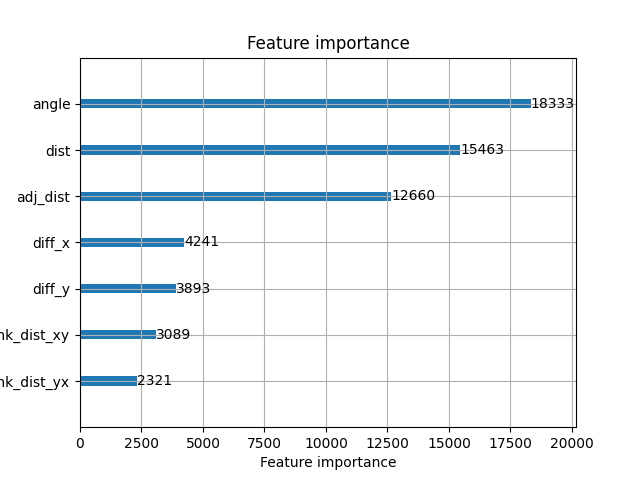

In [95]:
lgb.plot_importance(model)
plt.show()

In [24]:
import pickle
with open('model_lg', 'wb') as f:
    pickle.dump(model, f)

In [69]:
X_train.head()

,azimuth_x,azimuth_y,angleBWSites,site_cell_angle,cosAnlgeBWSites,cosTotalAngle,distance_x,rankDistance
27919,140.0,145.0,223,148.0,-0.731354,-0.848048,615.894825,1
121197,260.0,120.0,231,251.0,-0.629320,-0.325568,2805.108420,75
68260,280.0,0.0,43,323.0,0.731354,0.798636,3400.598913,17
54194,180.0,0.0,22,202.0,0.927184,-0.927184,1886.211180,33
130661,270.0,240.0,135,285.0,-0.707107,0.258819,2324.780201,14


In [22]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94      1949
         1.0       0.75      0.76      0.76       456

    accuracy                           0.91      2405
   macro avg       0.85      0.85      0.85      2405
weighted avg       0.91      0.91      0.91      2405



In [27]:
D_te['y2']=model.predict(X_test)

In [28]:
D_te[D_te['y']!=D_te['y2']].to_csv("Wrong classified.csv")

### XGBoost

In [107]:
start = datetime.datetime.now()
model=XGBClassifier(n_jobs=-1)
parameters = {'max_depth':[1,2,3,5],'n_estimators':[200,500,1000,2000]}
clf = GridSearchCV(model, parameters, cv=2, scoring='f1',return_train_score=True,n_jobs=-1)
clf.fit(X_train,y_train)
end= datetime.datetime.now()
print("Time taken for hyper parameter tuning is " +str(end-start))


[12:37:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Time taken for hyper parameter tuning is 0:01:12.529445


<IPython.core.display.Javascript object>


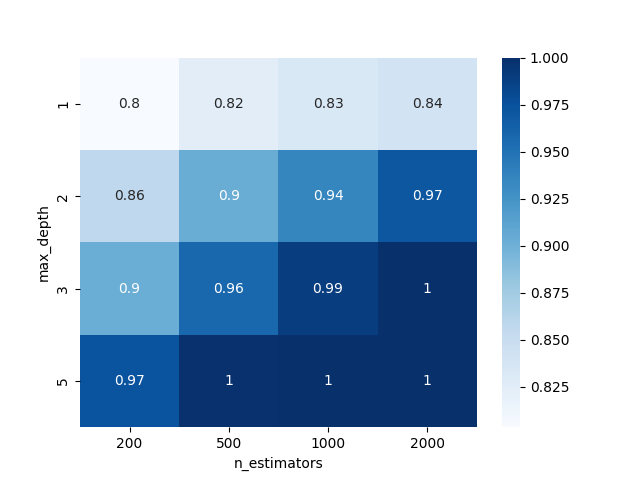

In [108]:
results = pd.DataFrame.from_dict(clf.cv_results_)
train_auc= results['mean_train_score']
cv_auc = results['mean_test_score'] 
sns.heatmap(np.array(train_auc).reshape(4,4), annot=True,cmap='Blues',xticklabels=parameters['n_estimators'],yticklabels=parameters['max_depth'])
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.show()

<IPython.core.display.Javascript object>


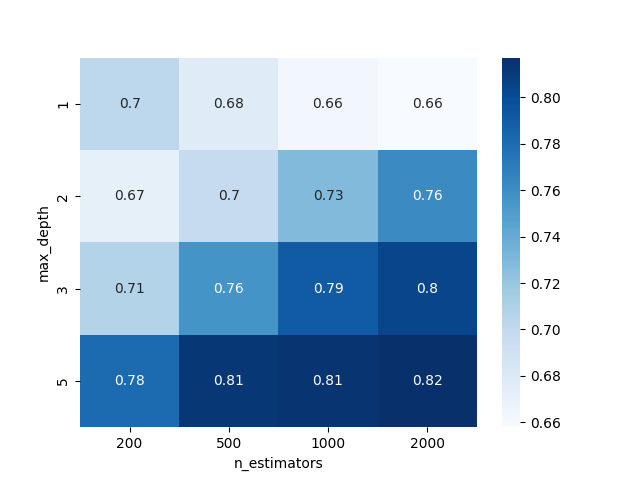

In [109]:
sns.heatmap(np.array(cv_auc).reshape(4,4), annot=True,cmap='Blues',xticklabels=parameters['n_estimators'],yticklabels=parameters['max_depth'])
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.show()

[12:38:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<IPython.core.display.Javascript object>


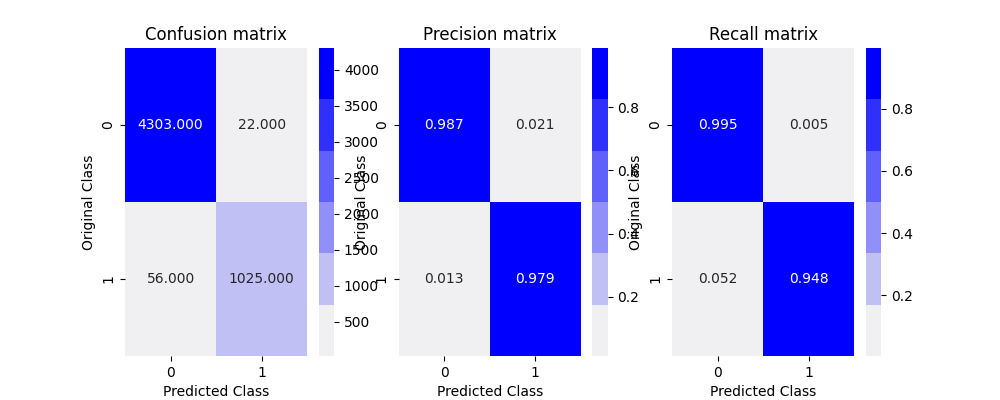

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      4325
         1.0       0.98      0.95      0.96      1081

    accuracy                           0.99      5406
   macro avg       0.98      0.97      0.98      5406
weighted avg       0.99      0.99      0.99      5406

F1 score is  0.9633458646616541


In [110]:
model=XGBClassifier(n_estimators=2000,max_depth=5)
model.fit(X_train,y_train)
plot_matrices(y_test,model.predict(X_test))
print(classification_report(y_test,model.predict(X_test)))
print(f"F1 score is  {f1_score(y_test,model.predict(X_test))}")

<IPython.core.display.Javascript object>


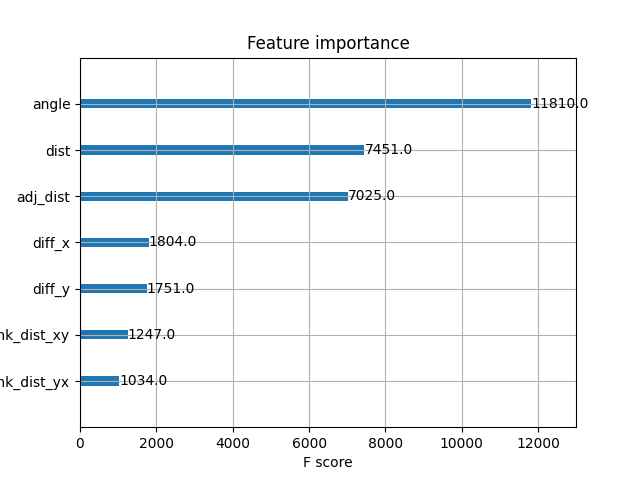

In [113]:
xgb.plot_importance(model)
plt.show()

In [30]:
import pickle
with open('model_xg', 'wb') as f:
    pickle.dump(model, f)


### Summary

In [114]:
x = PrettyTable()
x.field_names = [ "Model","Upsampling ", "F1 Score"]

x.add_row(["KNN","None","0.92"])
x.add_row(["KNN","SKLearn Upsampling ","0.93"])

x.add_row(["Logistic regression","None","0.62"])
x.add_row(["Logistic regression","SKLearn Upsampling ","0.68"])


x.add_row(["RF","None","0.79"])
x.add_row(["RF","SKLearn Upsampling ","0.86"])



x.add_row(["LGBoost","None","0.95"])
x.add_row(["LGBoost","SKLearn Upsampling ","0.94"])

x.add_row(["XGBoost","None","0.94"])
x.add_row(["XGBoost","SKLearn Upsampling ","0.97"])



print(x)

+---------------------+---------------------+----------+
|        Model        |     Upsampling      | F1 Score |
+---------------------+---------------------+----------+
|         KNN         |         None        |   0.92   |
|         KNN         | SKLearn Upsampling  |   0.93   |
| Logistic regression |         None        |   0.62   |
| Logistic regression | SKLearn Upsampling  |   0.68   |
|          RF         |         None        |   0.79   |
|          RF         | SKLearn Upsampling  |   0.86   |
|       LGBoost       |         None        |   0.95   |
|       LGBoost       | SKLearn Upsampling  |   0.94   |
|       XGBoost       |         None        |   0.94   |
|       XGBoost       | SKLearn Upsampling  |   0.97   |
+---------------------+---------------------+----------+


Light Gradient boost classifier with parameters max_depth=7 and classifiers=2000 is best performing is selected as final model.
Precision and recall values are also very good.
It is noted that custom created features are very helpful in classification.